Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the file from Device

In [3]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


Reading The training data

In [ ]:
df=pd.read_csv('train.csv')
df

Checking Null Values

In [ ]:
df.info()
df.isnull().sum()

Managing Null Values

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.isnull().sum()

In [25]:
df['Family']=df['SibSp']+df['Parch']+1
df['Alone']=(df['Family']==1).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Family       891 non-null    int64  
 12  Alone        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [26]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [27]:
df['Title']=df['Title'].replace(['Jonkheer','Countess','Capt','Sir','Lady','Don','Mme','Ms','Major','Mlle','Col','Rev','Dr'],'Rare')
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Rare,27


In [28]:
df=pd.get_dummies(df,columns=['Title','Sex','Embarked'],drop_first=True)

In [29]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Family       891 non-null    int64  
 10  Alone        891 non-null    int64  
 11  Title_Miss   891 non-null    bool   
 12  Title_Mr     891 non-null    bool   
 13  Title_Mrs    891 non-null    bool   
 14  Title_Rare   891 non-null    bool   
 15  Sex_male     891 non-null    bool   
 16  Embarked_Q   891 non-null    bool   
 17  Embarked_S   891 non-null    bool   
dtypes: bool(7), float64(2), int64(7), object(2)
memory

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Family,0


<Axes: xlabel='Survived', ylabel='count'>

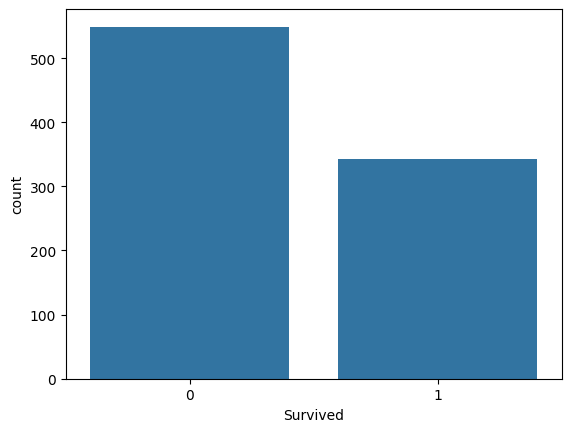

In [34]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

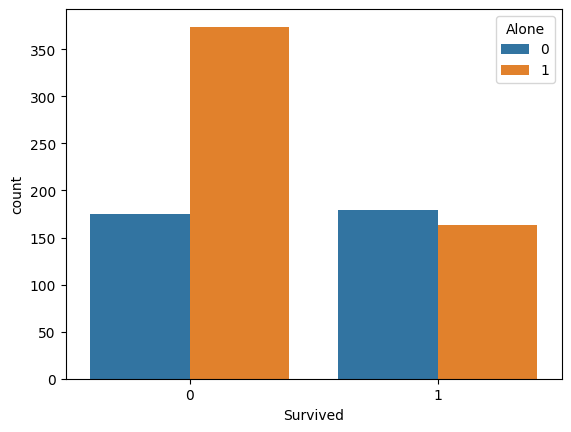

In [35]:
sns.countplot(x='Survived',hue=df['Alone'],data=df)

<Axes: xlabel='Survived', ylabel='count'>

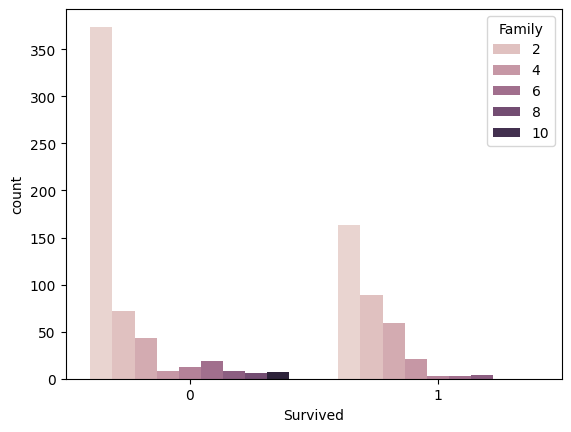

In [38]:
sns.countplot(x='Survived',hue=df['Family'],data=df)

<Axes: xlabel='Survived', ylabel='count'>

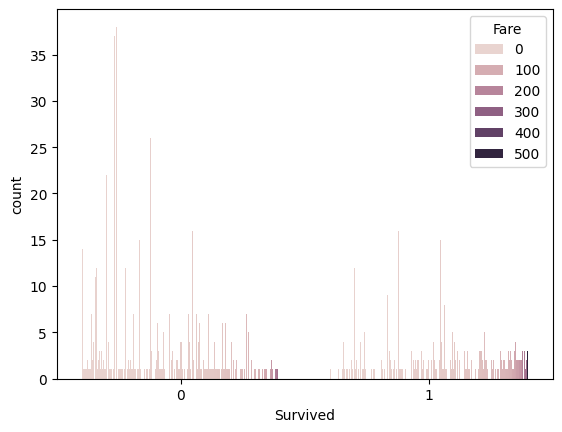

In [39]:
sns.countplot(x='Survived',hue=df['Fare'],data=df)

<Axes: xlabel='Survived', ylabel='count'>

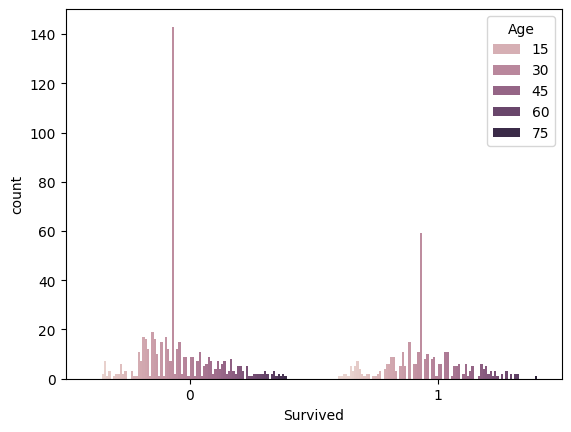

In [40]:
sns.countplot(x='Survived',hue=df['Age'],data=df)

<Axes: xlabel='Survived', ylabel='count'>

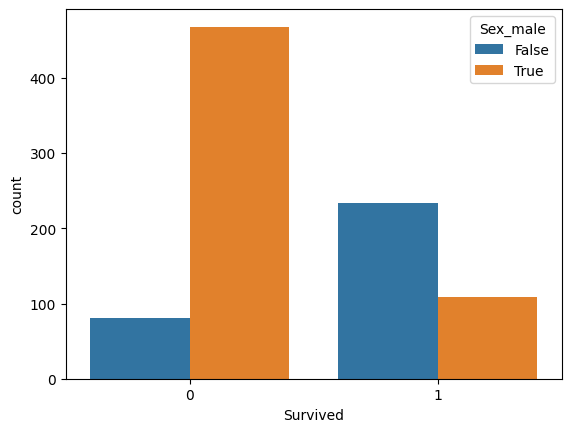

In [42]:
sns.countplot(x='Survived',hue=df['Sex_male'],data=df)

In [44]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = df['Survived']

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Family       891 non-null    int64  
 10  Alone        891 non-null    int64  
 11  Title_Miss   891 non-null    bool   
 12  Title_Mr     891 non-null    bool   
 13  Title_Mrs    891 non-null    bool   
 14  Title_Rare   891 non-null    bool   
 15  Sex_male     891 non-null    bool   
 16  Embarked_Q   891 non-null    bool   
 17  Embarked_S   891 non-null    bool   
dtypes: bool(7), float64(2), int64(7), object(2)
memory

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[90 15]
 [15 59]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

0.8324022346368715


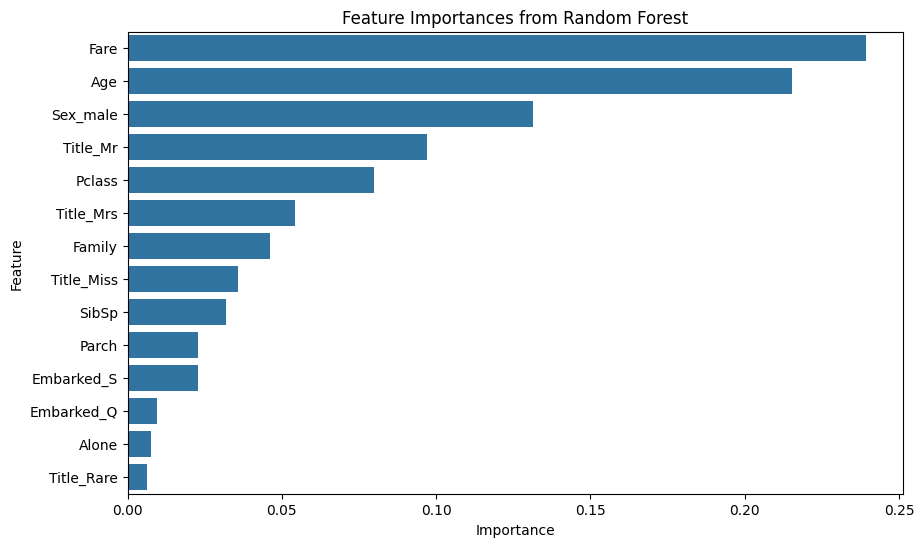

In [56]:
importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances from Random Forest')
plt.show()

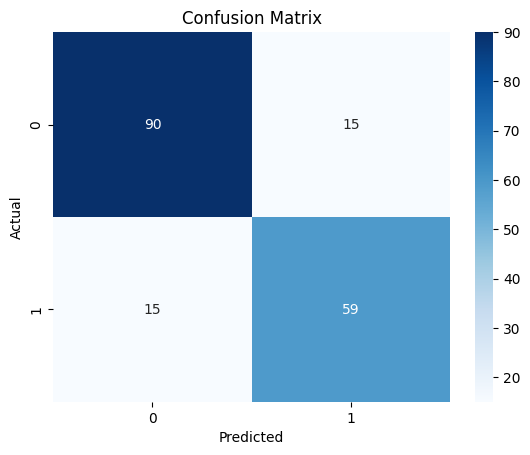

In [55]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

0.8156424581005587


Making the Submission File

In [61]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [ ]:
fd=pd.read_csv('test.csv')
fd

In [65]:
fd.info()
fd.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [67]:
fd['Age'].fillna(fd['Age'].median(),inplace=True)
fd['Fare'].fillna(fd['Fare'].median(),inplace=True)
fd.drop('Cabin',axis=1,inplace=True)
fd['Family']=fd['SibSp']+fd['Parch']+1
fd['Alone']=(fd['Family']==1).astype(int)
fd.info()
fd.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Family       418 non-null    int64  
 11  Alone        418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


/tmp/ipython-input-67-1589865418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fd['Fare'].fillna(fd['Fare'].median(),inplace=True)


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [70]:
fd['Title']=fd['Name'].str.extract('([A-Za-z]+)\.',expand=True)
fd['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [72]:
fd['Title']=fd['Title'].replace(['Dona','Ms','Col','Rev','Dr','Master'],'Rare')
fd['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Rare,28


In [77]:
fd=pd.get_dummies(fd,columns=['Title','Sex','Embarked'],drop_first=True)
fd.info()
fd.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Family       418 non-null    int64  
 9   Alone        418 non-null    int64  
 10  Title_Mr     418 non-null    bool   
 11  Title_Mrs    418 non-null    bool   
 12  Title_Rare   418 non-null    bool   
 13  Sex_male     418 non-null    bool   
 14  Embarked_Q   418 non-null    bool   
 15  Embarked_S   418 non-null    bool   
dtypes: bool(6), float64(2), int64(6), object(2)
memory usage: 35.2+ KB


,0
PassengerId,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Family,0
Alone,0


In [81]:
feature=X.columns
missing_cols = set(feature) - set(fd.columns)
for col in missing_cols:
    fd[col] = 0
fd = fd[feature]
fd.isnull().sum()

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Family,0
Alone,0
Title_Miss,0
Title_Mr,0
Title_Mrs,0


In [83]:
combined = pd.concat([df.drop('Survived', axis=1), fd])
combined_encoded = pd.get_dummies(combined)

X_train_encoded = combined_encoded[:len(df)]
X_test_encoded = combined_encoded[len(df):]
y_train = df['Survived']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [84]:
rf_final=rf_model.predict(X_test_encoded)
print(rf_final[:10])

[0 0 0 0 1 0 1 0 1 0]


In [89]:
original_test = pd.read_csv("test.csv")
passenger_ids = original_test['PassengerId']
#due to having issues with passenger id..we recalled the file and use passenger id from that

submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": rf_final.astype(int)
})
submission.to_csv("titanic_rf_submission_2.csv", index=False)